In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='3'
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# from transformers import PaliGemmaProcessor, PaliGemmaForConditionalGeneration
from src.processing_paligemma import PaliGemmaProcessor
from src.modeling_paligemma import PaliGemmaForConditionalGeneration

from transformers.image_utils import load_image
from PIL import Image
import torch

model_id = "google/paligemma2-3b-mix-448"
device = "cuda:0"

url1 = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/cat.jpg"
url2 = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
image1 = load_image(url1)
image2 = load_image(url2)

image1 = image1.resize((224,224))
image2 = image2.resize((224,224))

print(image1.size)

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16).eval()
processor = PaliGemmaProcessor.from_pretrained(model_id)

prompt = "<image> <image> Reply with only the correct option. Is there a cat? a) yes b) no c) both exist"

# prompt1 = "<image> <image> Reply with only the correct option. Is there a cat? a) yes b) no c) both exist"
# prompt2 = "<image> <image> Reply with only the correct option. Is there a cat? a) yes b) no c) both exist (d) neither exist"

model_inputs = processor(text=prompt, images=[[image2, image1, image1, image1, image1, image1, image1, image1]], return_tensors="pt").to(torch.bfloat16).to(model.device)

# model_inputs = processor(text=[prompt1, prompt2], images=[[image2, image1], [image2, image1]], return_tensors="pt", padding=True).to(torch.bfloat16).to(model.device)

print(model_inputs.keys())

input_len = model_inputs["input_ids"].shape[-1]

# with torch.inference_mode():
#     generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
#     generation = generation[0][input_len:]
#     decoded = processor.decode(generation, skip_special_tokens=True)
#     print(decoded)

/data1/ai24mtech02001/miniconda3/envs/physic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(224, 224)


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


dict_keys(['input_ids', 'attention_mask', 'pixel_values'])


(224, 224)


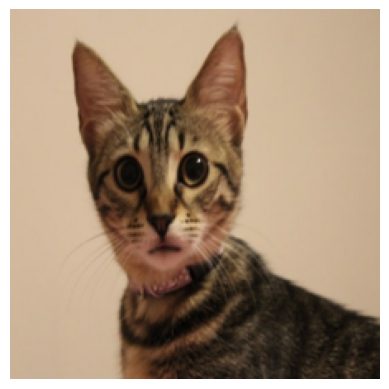

In [2]:
model_inputs["pixel_values"].shape
print(image2.size)

import matplotlib.pyplot as plt
plt.imshow(image1)
plt.axis('off')
plt.show()

In [2]:
out = model(**model_inputs)

In [19]:
out.logits.shape

torch.Size([2, 2072, 257216])

In [2]:
# from transformers.processing_utils import ProcessorMixin
# import inspect

# print(inspect.getsource(ProcessorMixin))

In [3]:
for i, _ in model.named_parameters():
    print(i)

vision_tower.vision_model.embeddings.patch_embedding.weight
vision_tower.vision_model.embeddings.patch_embedding.bias
vision_tower.vision_model.embeddings.position_embedding.weight
vision_tower.vision_model.encoder.layers.0.layer_norm1.weight
vision_tower.vision_model.encoder.layers.0.layer_norm1.bias
vision_tower.vision_model.encoder.layers.0.self_attn.k_proj.weight
vision_tower.vision_model.encoder.layers.0.self_attn.k_proj.bias
vision_tower.vision_model.encoder.layers.0.self_attn.v_proj.weight
vision_tower.vision_model.encoder.layers.0.self_attn.v_proj.bias
vision_tower.vision_model.encoder.layers.0.self_attn.q_proj.weight
vision_tower.vision_model.encoder.layers.0.self_attn.q_proj.bias
vision_tower.vision_model.encoder.layers.0.self_attn.out_proj.weight
vision_tower.vision_model.encoder.layers.0.self_attn.out_proj.bias
vision_tower.vision_model.encoder.layers.0.layer_norm2.weight
vision_tower.vision_model.encoder.layers.0.layer_norm2.bias
vision_tower.vision_model.encoder.layers.0.

In [4]:
prompt1 = "<image> "+ prompt

model_inputs = processor(text=prompt1, images=[image1], return_tensors="pt").to(torch.bfloat16).to(model.device)
print(model_inputs["input_ids"].shape)
print(model_inputs["pixel_values"].shape)
print(model_inputs["attention_mask"].shape)

prompt2 = "<image><image> " + prompt
model_inputs = processor(text=prompt2, images=[[image2, image1]], return_tensors="pt").to(torch.bfloat16).to(model.device)
print(model_inputs["input_ids"].shape)
print(model_inputs["pixel_values"].shape)
print(model_inputs["attention_mask"].shape)

prompt3 = "<image><image><image> " + prompt
model_inputs = processor(text=prompt3, images=[[image2, image1, image2]], return_tensors="pt").to(torch.bfloat16).to(model.device)
print(model_inputs["input_ids"].shape)
print(model_inputs["pixel_values"].shape)
print(model_inputs["attention_mask"].shape)

prompt4 = "<image><image><image><image> " + prompt
model_inputs = processor(text=prompt4, images=[[image2, image1, image2, image1]], return_tensors="pt").to(torch.bfloat16).to(model.device)
print(model_inputs["input_ids"].shape)
print(model_inputs["pixel_values"].shape)
print(model_inputs["attention_mask"].shape)

torch.Size([1, 1044])
torch.Size([1, 3, 448, 448])
torch.Size([1, 1044])
torch.Size([1, 2068])
torch.Size([2, 3, 448, 448])
torch.Size([1, 2068])
torch.Size([1, 3092])
torch.Size([3, 3, 448, 448])
torch.Size([1, 3092])
torch.Size([1, 4116])
torch.Size([4, 3, 448, 448])
torch.Size([1, 4116])


In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='3'

from transformers import AutoProcessor
from modeling_paligemma import PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch

model_id = "google/paligemma-3b-mix-224"
device = "cuda:0"
dtype = torch.bfloat16

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

model = PaliGemmaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=dtype,
    device_map=device,
    revision="bfloat16",
).eval()
processor = AutoProcessor.from_pretrained(model_id)



/data/ai24mtech02001/miniconda3/envs/physic/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/ai24mtech02001/miniconda3/envs/physic/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/data/ai24mtech02001/miniconda3/envs/physic/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Loading checkpoint shards: 100%|██████████| 2/2 [00:16<00:00,  8.12s/it]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with thi

In [2]:
# Instruct the model to create a caption in Spanish
prompt = "<image> <image> caption es"
model_inputs = processor(text=prompt, images=[[image, image]], return_tensors="pt").to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

print(model_inputs.keys())
print(model_inputs["input_ids"].shape)
print(model_inputs["attention_mask"].shape)
print(model_inputs["pixel_values"].shape)

# with torch.inference_mode():
#     generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
#     generation = generation[0][input_len:]
#     decoded = processor.decode(generation, skip_special_tokens=True)
#     print(decoded)

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])
torch.Size([1, 517])
torch.Size([1, 517])
torch.Size([2, 3, 224, 224])


In [3]:
from torch_trace_utils import Trace, module_names

# Get the first non-root layer
layer_name = next(name for name in module_names(model) if name)
print(f"Tracing layer: {layer_name}")

# Trace that layer while generating
with Trace(model, layer=layer_name, retain_output=True, detach=True) as tr:
    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)

# Get only new generated tokens
generated_tokens = generation[0][input_len:]
decoded = processor.decode(generated_tokens, skip_special_tokens=True)

print("Generated:", decoded)

# Show activation
activation = tr.output
print(f"Activation from {layer_name}:")
if isinstance(activation, torch.Tensor):
    print(f"Shape: {activation.shape}")
else:
    print("Non-tensor activation:", activation)

Tracing layer: vision_tower
***********************************
Pixelvalues torch.Size([2, 3, 224, 224])
torch.Size([2, 256, 2048])
***********************************
Generated: Un auto azul estacionado frente a un edificio.
Activation from vision_tower:
Non-tensor activation: BaseModelOutputWithPooling(last_hidden_state=tensor([[[-1.1250e+00,  3.4570e-01,  1.3184e-02,  ..., -8.5938e-01,
          -1.9062e+00, -1.1377e-01],
         [-2.7031e+00, -7.1094e-01,  5.7812e-01,  ...,  1.5918e-01,
          -1.7891e+00,  4.7070e-01],
         [-1.1719e+00,  1.2969e+00, -6.1719e-01,  ...,  5.8594e-01,
           9.1016e-01, -1.2734e+00],
         ...,
         [ 1.9836e-03, -2.9102e-01,  3.8281e-01,  ...,  2.8711e-01,
           8.8379e-02,  1.1377e-01],
         [-6.6797e-01,  4.0234e-01,  1.9844e+00,  ...,  9.8438e-01,
           2.6953e-01, -2.0508e-01],
         [-7.9297e-01, -2.2266e-01, -1.3574e-01,  ..., -1.6309e-01,
          -2.1387e-01,  1.5820e-01]],

        [[-1.1250e+00,  3.4570

In [7]:
from torch_trace_utils import Trace, module_names

# Get the first non-root layer
layer_names = [name for name in module_names(model) if name]
layer_names

['vision_tower',
 'vision_tower.vision_model',
 'vision_tower.vision_model.embeddings',
 'vision_tower.vision_model.embeddings.patch_embedding',
 'vision_tower.vision_model.embeddings.position_embedding',
 'vision_tower.vision_model.encoder',
 'vision_tower.vision_model.encoder.layers',
 'vision_tower.vision_model.encoder.layers.0',
 'vision_tower.vision_model.encoder.layers.0.self_attn',
 'vision_tower.vision_model.encoder.layers.0.self_attn.k_proj',
 'vision_tower.vision_model.encoder.layers.0.self_attn.v_proj',
 'vision_tower.vision_model.encoder.layers.0.self_attn.q_proj',
 'vision_tower.vision_model.encoder.layers.0.self_attn.out_proj',
 'vision_tower.vision_model.encoder.layers.0.layer_norm1',
 'vision_tower.vision_model.encoder.layers.0.mlp',
 'vision_tower.vision_model.encoder.layers.0.mlp.activation_fn',
 'vision_tower.vision_model.encoder.layers.0.mlp.fc1',
 'vision_tower.vision_model.encoder.layers.0.mlp.fc2',
 'vision_tower.vision_model.encoder.layers.0.layer_norm2',
 'visi

In [20]:
from torch_trace_utils import TraceDict

layers = ['vision_tower.vision_model.encoder.layers.5.self_attn', 
          'vision_tower.vision_model.encoder.layers.4.self_attn.k_proj',
          'language_model.model.layers.15.self_attn.v_proj',
           ]

with TraceDict(model, layers=layers, retain_output=True, detach=True) as tr:
    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    vis_attn = tr[layers[0]].output
    vis_key = tr[layers[1]].output
    lm_mlp = tr[layers[2]].output

print(vis_attn)
print(vis_key.shape)
print(lm_mlp.shape)
    

tensor([[[-0.4414,  1.1641, -0.0625,  ..., -0.9062,  0.5117, -1.8672],
         [ 1.4062,  2.7344,  0.8945,  ..., -0.1787,  0.1475, -0.3145],
         [ 0.1055,  0.1104,  0.5977,  ...,  2.4062,  2.2344, -0.8047],
         ...,
         [ 0.4551,  1.1562,  1.7656,  ...,  0.7344,  0.3066, -1.7031],
         [-0.6211, -0.0347,  3.0000,  ...,  0.5703, -0.4512, -1.6953],
         [-0.4238,  0.0476,  1.9453,  ..., -0.2656, -1.4297, -1.7344]]],
       device='cuda:0', dtype=torch.bfloat16)
(tensor([[[ 0.4375,  0.2197, -0.1836,  ..., -0.3125,  0.0435, -0.0669],
         [ 0.4121,  0.4297, -0.1055,  ..., -0.3281,  0.2988,  0.2021],
         [ 0.0427,  0.2969, -0.0874,  ..., -0.2734, -0.0070,  0.1514],
         ...,
         [-0.1660,  0.4766, -0.1484,  ..., -0.1108, -0.1533,  0.0295],
         [ 0.1426,  0.1436, -0.0209,  ..., -0.1504,  0.0938, -0.1592],
         [ 0.0198,  0.1436,  0.0325,  ..., -0.1924, -0.0337, -0.1338]]],
       device='cuda:0', dtype=torch.bfloat16), None)
tensor([[[-5.718

In [2]:
from PIL import Image

# Path to a single frame
frame_path = "frame_captures/video_00000-01000/video_00000/frame_0.jpg"

# Load the image
image = Image.open(frame_path)

# Get resolution
width, height = image.size

print(f"Resolution: {width} x {height}")


Resolution: 480 x 320


In [60]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from transformers import PaliGemmaProcessor, PaliGemmaForConditionalGeneration
import torch
from torch.utils.data import DataLoader
from data import ClevrerDataset
import torchvision.transforms as transforms
import numpy as np
from transformers import BitsAndBytesConfig, PaliGemmaForConditionalGeneration
from peft import get_peft_model, LoraConfig


model_id = "google/paligemma2-3b-mix-448"

# device = "cuda:2" if torch.cuda.is_available() else "cpu"
device = "cuda"
# model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, device_map="auto", quantization_config=bnb_config)
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, device_map="auto")#, quantization_config=bnb_config)



Loading checkpoint shards: 100%|██████████| 2/2 [00:51<00:00, 25.57s/it]
Some parameters are on the meta device because they were offloaded to the cpu.


In [62]:
# print(model.language_model.model.layers[0])

def hook_0(model, input):
    print(input.size)
    return

def forward_hook_0(model, input, output):
    print(input[0].shape)
    print(output.shape)
    print(output)
    zeros = torch.zeros_like(output)
    return zeros

# model.language_model.model.layers[0].post_feedforward_layernorm.register_module_forward_hook(hook_0)
# print(model.language_model.model.layers[0])

# module_pre_hook = model.language_model.model.layers[0].self_attn.k_proj
# pre_hook = module_pre_hook.register_forward_pre_hook(hook_0)

module_hook = model.language_model.model.layers[0].self_attn.k_proj
hook_00 = module_hook.register_forward_hook(forward_hook_0)

In [46]:
# print(model)

In [28]:
transform = transforms.Compose([
        transforms.Resize((448, 448)),
        transforms.ToTensor()
    ])

dataset = ClevrerDataset(
    frames_root='frame_captures',
    json_path='train.json',
    transform=transform
)

sample = dataset[0]

sample.keys()



dict_keys(['frames', 'question_id', 'question_type', 'question', 'answer', 'video_filename'])

In [15]:
DTYPE = model.dtype

processor = PaliGemmaProcessor.from_pretrained(model_id)

tokens = processor(
        text=sample['question'],
        images=[sample['frames']],
        return_tensors='pt',
        do_rescale=False,
        padding="longest",
        suffix=sample['answer'],
    ).to(device, DTYPE)


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


In [64]:
with torch.inference_mode():
    outputs = model.generate(**tokens, max_new_tokens=100, do_sample=False)

torch.Size([1, 8209, 2304])
torch.Size([1, 8209, 1024])
tensor([[[ 3.8919e+00,  1.8448e+00, -1.7066e+00,  ..., -7.4078e-02,
           2.2943e+00, -3.6701e-03],
         [ 4.8656e+00,  1.6644e+00, -1.9202e+00,  ..., -3.3265e-01,
           3.0327e+00, -7.0572e-01],
         [ 3.8359e+00,  1.9977e+00, -1.0254e+00,  ...,  1.3793e-02,
           4.7803e-02, -7.6289e-01],
         ...,
         [ 5.5845e+00,  1.6271e-01, -1.7239e+00,  ..., -1.6045e+00,
          -2.7559e+00, -2.0482e-03],
         [ 4.8920e+00,  1.6215e-01, -3.4885e+00,  ..., -1.5981e+00,
           1.5658e+00,  2.1848e-01],
         [ 4.8524e+00, -1.1919e+00, -1.4414e+00,  ..., -1.1469e+00,
          -1.9321e+00,  2.4979e-01]]], device='cuda:0')
torch.Size([1, 1, 2304])
torch.Size([1, 1, 1024])
tensor([[[ 4.8920,  0.1622, -3.4885,  ..., -1.5981,  1.5658,  0.2185]]],
       device='cuda:0')


In [65]:
outputs

tensor([[257152, 257152, 257152,  ...,      1,   8796,      1]],
       device='cuda:0')

In [63]:
def print_hooks(model):
    for name, module in model.named_modules():
        if hasattr(module, '_forward_hooks'):
            for key, hook in module._forward_hooks.items():
                print(f"Forward hook found in module: {name}, hook id: {key}, hook: {hook}")
        if hasattr(module, '_backward_hooks'):
             for key, hook in module._backward_hooks.items():
                print(f"Backward hook found in module: {name}, hook id: {key}, hook: {hook}")

print_hooks(model)

# hook.remove()
# print_hooks(model)


Forward hook found in module: language_model.model.layers.0.self_attn.k_proj, hook id: 12, hook: <function forward_hook_0 at 0x7c33d093c220>


In [54]:
# sample
len(outputs)

1

In [66]:
input_len = tokens["input_ids"].shape[1]

for i, output in enumerate(outputs):
    decoded = processor.decode(output[input_len:], skip_special_tokens=True)
    print(f"Video: {sample['video_filename']}")
    print(f"QID: {sample['question_id']}")
    print(f"Q: {sample['question']}")
    print(f"GT: {sample['answer']}")
    print(f"Predicted: {decoded}")
    print()

Video: video_03383.mp4
QID: 0
Q: What color is the first object to collide with the rubber cylinder?
GT: blue
Predicted: blue

